<a href="https://colab.research.google.com/github/15021996/Loan-Default-Prediction/blob/main/Soumya_Loan_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Loan Default Prediction : Predicting whether a customer will default on a loan.</u></b>

### Numerous companies from financial indutry often invest considerable resources to improve their predictive models with the aim of having better insights into their customers. Such an interest in model improvement has intensified in recent years mostly because of fast development of machine learning and artificial intelligence. For standard lending institution default predictive model with high performance helps to considerably minimize Credit Loss, resulting in higher revenue and profits. Usually the better predictive model the more efficient is the underwriting policy and collection process. A well-functioning model should distinguish creditworthy customers from those that are credit risks. Often, more-predictive credit-decisioning model can identify a greater number of customers within an institution’s specified risk tolerance, which should expand revenues as well.

### In this project the goal is to increase detection of defaulted loans before the loan is issued/offered by P2P lending company - Lending Club. Peer-to-peer lending differs from traditional financial institutions like banks or commercial lending companies.

### So, Lending Club is a mediator between investors and borrowers, earning money by charging both. The main Lending Club interest is to attract more clients and maintain protfolio size. The motivation of borrowers is clear, they want to find as cheap capital as possible, so they're seeking for the best offer at the market, which is available for them. In case of investors the motivation is obvious as well. Investors look for high ROI (return of investments), but remembering that returns are proportional to risks, we may formalize saying, that investors look for appropriate returns/risks ratio. If investors experience losses it may cause churn rate growth.

### The underwriting process for Lending Club looks like this. Borrower applies for the loan, then if he/she meets all the basic requirements - Lending Club using their scoring model assigns client to respective grade. There are 7 grades and 35 sub-grades. Interest rate is dependent on sub-grade. After that, Lending Club gives access to the loan for investors with information about the loan and the borrower (incl. grade and sub-grade) and investors decide whether or not to invest money in this loan. The lower the grade the higher the interest rate, which means, that investors may take higher risks to gain potentially higher returns.

### Seeking for default rate reduction we can end up with too restrictive underwriting policy which does not neccessary correlate with higher ROI for investors, because we'll not let investors choose risky loans, which means lower interests. For Lending Club it probably means the loss of investors with high risk appetite and borrowers with weak credit history, or in case of Lending Club those who need higher loan amount.

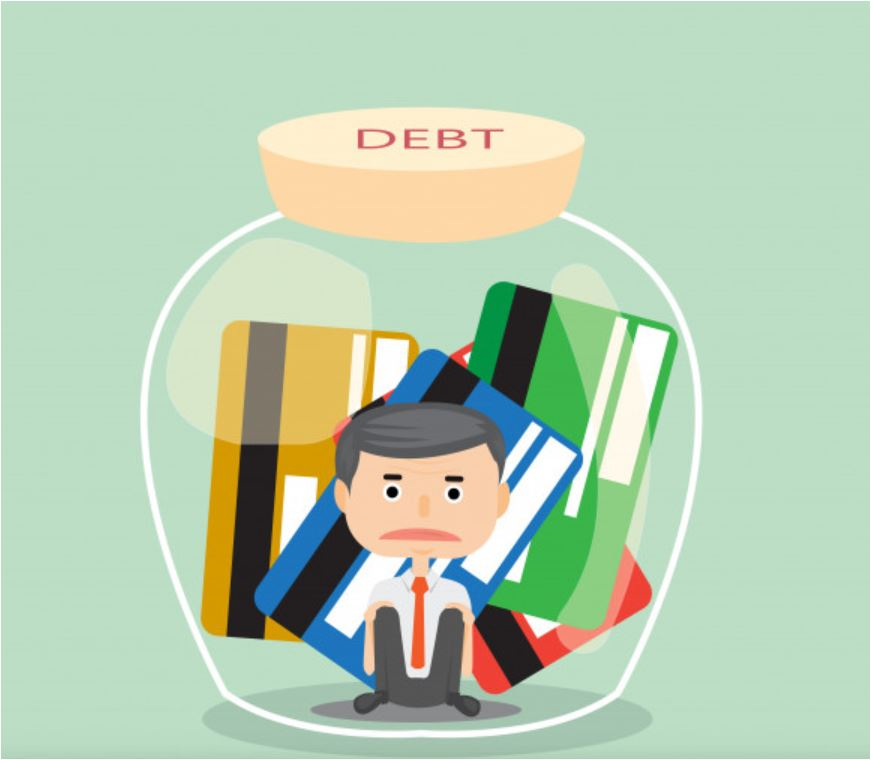

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data1 = pd.read_csv("/content/drive/MyDrive/AlmaBetter/CohortAravali/Cohort Aravali/Module 3/Capstone-Project 2/LCDataDictionary.csv")
list(data1.columns.values)

['LoanStatNew', 'Description']

In [4]:
data1.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [6]:
data2 = pd.read_csv("/content/drive/MyDrive/AlmaBetter/CohortAravali/Cohort Aravali/Module 3/Capstone-Project 2/lending_club_loans.csv",skiprows=1)
list(data2.columns.values)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [7]:
data2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
data2.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,0.0,42535.0,0.0,0.0,0.0,42506.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42390.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,22.124406,11.849562,11.815891,12005.641023,11298.592611,9664.271346,2239.547094,1.515321,100.307353,13.956737,2612.720097,689.305302,676.382744,0.0,NaN,1.0,NaN,NaN,NaN,0.000094,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.143039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,11.592811,125.376563,125.061859,9067.243728,9010.323570,7087.469380,2583.722104,7.827800,718.078716,159.621861,4385.198940,80.202882,119.011555,0.0,NaN,0.0,NaN,NaN,NaN,0.009700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.359579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,0.000000,17.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,0.000000,0.000000,5462.787435,4791.415000,4400.000000,657.100000,0.000000,0.000000,0.000000,211.370000,644.000000,640.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


In [10]:
##Finding the the count and percentage of values that are missing in the dataframe.
data2_null = pd.DataFrame({'Count': data2.isnull().sum(), 'Percent': 100*data2.isnull().sum()/len(data2)})

##printing columns with null count more than 0
data2_null[data2_null['Count'] > 0] 

,Count,Percent
member_id,3,0.007053
loan_amnt,3,0.007053
funded_amnt,3,0.007053
funded_amnt_inv,3,0.007053
term,3,0.007053
...,...,...
tax_liens,108,0.253891
tot_hi_cred_lim,42538,100.000000
total_bal_ex_mort,42538,100.000000
total_bc_limit,42538,100.000000


As you can see, there are a lot of columns which have huge chunk of data missing. These columns are not necessary for our analysis. The following part will drop any columns where 80% or more data is missing. This will help us clean the Dataset a little bit.

In [17]:
df1 = data2.dropna(axis=1, thresh=int(0.99*len(data2)))

In [18]:
df1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-2016,67.79,Sep-2016,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0


In [25]:
data1.tail(15)

,LoanStatNew,Description
102,total_bc_limit,Total bankcard high credit/credit limit
103,total_cu_tl,Number of finance trades
104,total_il_high_credit_limit,Total installment high credit/credit limit
105,total_pymnt,Payments received to date for total amount funded
106,total_pymnt_inv,Payments received to date for portion of total...
107,total_rec_int,Interest received to date
108,total_rec_late_fee,Late fees received to date
109,total_rec_prncp,Principal received to date
110,total_rev_hi_lim,Total revolving high credit/credit limit
111,url,URL for the LC page with listing data.


In [20]:
len(df1.columns)

54

In [15]:
df1["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [16]:
print (df1.emp_title.value_counts())


US Army                                   139
Bank of America                           115
IBM                                        72
AT&T                                       61
Kaiser Permanente                          61
                                         ... 
Myrtle Beach Pelicans                       1
Rainin                                      1
Euro International  Inc                     1
GDH Consulting Professional Svcs Group      1
Voices and Visions                          1
Name: emp_title, Length: 30658, dtype: int64


In [21]:
df1.tax_liens.value_counts()

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

A tax lien is a lien imposed by law upon a property to secure the payment of taxes. A tax lien may be imposed for delinquent taxes owed on real property or personal property, or as a result of failure to pay income taxes or other taxes.

In [22]:
df1.delinq_amnt.value_counts()

0.0       42504
6053.0        1
27.0          1
Name: delinq_amnt, dtype: int64

In the personal finance field, the term "delinquent" commonly refers to a situation where a borrower is late or overdue on a payment, such as income taxes, a mortgage, an automobile loan, or a credit card account.

There are consequences for being delinquent, depending on the type, duration, and cause of the delinquency. People who are late with a credit card payment may be forced to pay a late fee. In the case of a mortgage, the lender can initialize foreclosure proceedings if the mortgage payments are not brought up to date within a certain amount of time.

In [23]:
df1.chargeoff_within_12_mths.value_counts()

0.0    42390
Name: chargeoff_within_12_mths, dtype: int64

In [24]:
df1.acc_now_delinq.value_counts()

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64

In [26]:
df1.application_type.value_counts()

INDIVIDUAL    42535
Name: application_type, dtype: int64

Can drop this column as it has only 1 unique value.

In [27]:
df1.policy_code.value_counts()

1.0    42535
Name: policy_code, dtype: int64

Can drop this column as it is of no relevance to our model.

In [28]:
df1.collections_12_mths_ex_med.value_counts()

0.0    42390
Name: collections_12_mths_ex_med, dtype: int64

In [30]:
data1.loc[data1['LoanStatNew'] == 'collections_12_mths_ex_med']

,LoanStatNew,Description
12,collections_12_mths_ex_med,Number of collections in 12 months excluding m...


Number of collections in 12 months excluding medical collections. This column can be dropped.

In [35]:
df1.last_fico_range_low.value_counts(ascending=True)

845.0       8
840.0      37
835.0      41
830.0     129
825.0     153
         ... 
715.0    1230
710.0    1245
695.0    1248
690.0    1267
705.0    1283
Name: last_fico_range_low, Length: 71, dtype: int64

One of the most well-known types of credit score are FICO® Scores, created by the Fair Isaac Corporation. FICO® Scores are used by many lenders, and often range from 300 to 850. A FICO® Score of 670 or above is considered a good credit score, while a score of 800 or above is considered exceptional.

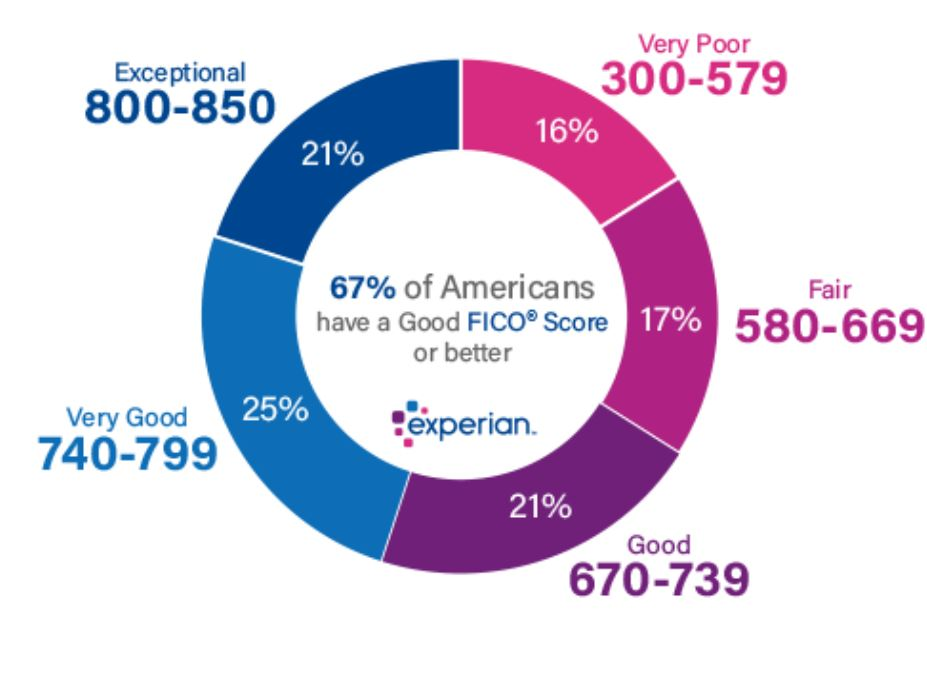

In [34]:
df1.last_fico_range_low[df1.last_fico_range_low > 670].count()

26443

In [36]:
df1.last_fico_range_high.value_counts(ascending=True)

850.0       8
844.0      37
0.0        38
839.0      41
834.0     129
         ... 
719.0    1230
714.0    1245
699.0    1248
694.0    1267
709.0    1283
Name: last_fico_range_high, Length: 72, dtype: int64

In [51]:
df1['last_fico_range'] = df1.last_fico_range_low.astype('str') + '-' + df1.last_fico_range_high.astype('str')
df1['last_meanfico'] = (df1.last_fico_range_low + df1.last_fico_range_high)/2
df1.drop(['last_fico_range_low','last_fico_range_high'],1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [37]:
df1.last_credit_pull_d.value_counts()

Sep-2016    16232
Mar-2016      859
Aug-2016      771
Apr-2016      700
Feb-2013      696
            ...  
Dec-2007        3
May-2008        1
Jul-2007        1
Jul-2008        1
Jun-2008        1
Name: last_credit_pull_d, Length: 111, dtype: int64

The date of last activity tells you when your account took on a certain status. That status could be anything—paid, delinquent, or collections. If your date of last activity is for a negative status such as a charge off, then the older it is the less impact it will have on your credit.  On the other hand, if you haven’t used a credit card in a long time and your date of last activity is many months ago, the information on your credit account may not be used when calculating your credit score. This is particularly problematic if you have few open credit accounts and you’re trying to reestablish your credit history.  Try to use your credit accounts on a regular basis so that the positive information is used when calculating your FICO score.

In [39]:
df1.last_pymnt_amnt.value_counts(ascending=True)

3369.70      1
10766.81     1
344.85       1
921.39       1
91.13        1
            ..
150.00      13
100.00      17
50.00       17
200.00      19
0.00        96
Name: last_pymnt_amnt, Length: 37117, dtype: int64

Last total payment amount received from the borrower.

In [40]:
df1.last_pymnt_d.value_counts()

Mar-2013    1070
Dec-2014     949
May-2013     943
Feb-2013     906
Mar-2012     893
            ... 
Jun-2008      20
Mar-2008      18
Jan-2008      11
Feb-2008       8
Dec-2007       2
Name: last_pymnt_d, Length: 106, dtype: int64

The month-year in which last payment was recieved.

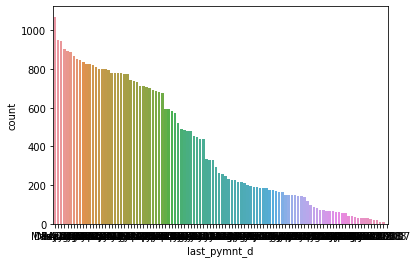

In [45]:
sns.countplot(data=df1, x='last_pymnt_d', order=df1.last_pymnt_d.value_counts().index)

In [47]:
df1.collection_recovery_fee.value_counts(ascending=True)

11.4154         1
2.5867          1
9.5864          1
247.5144        1
15.1732         1
            ...  
1.6000         10
0.8000         10
1.2000         11
2.0000         15
0.0000      38243
Name: collection_recovery_fee, Length: 2859, dtype: int64

A charge-off or chargeoff is a declaration by a creditor (usually a credit card account) that an amount of debt is unlikely to be collected. This occurs when a consumer becomes severely delinquent on a debt. Traditionally, creditors make this declaration at the point of six months without payment. 

In [49]:
df1.recoveries.value_counts(ascending=True)

384.42         1
20.12          1
318.99         1
1007.13        1
202.70         1
           ...  
13.59          3
10.40          4
11.29          4
13.93          4
0.00       37789
Name: recoveries, Length: 4530, dtype: int64

LendingClub may sell charged-off loans to a third party. In the event that a charged-off loan is sold to a third party or funds are recovered on a previously charged off loan, investors will receive a pro rata share of the sales proceeds or recovery amount, respectively, less any fees. In general, recoveries on previously charged-off loans are infrequent. 